### Limpieza de datos
Limpieza del archivo con los datos para el modelo de consumo individual casa_5.csv y clima_bcn.csv

In [24]:
import pandas as pd
import matplotlib.pyplot as plt

# Definir las rutas de los archivos
file_path_hogar = '../../../raw/datos_consumo/hogar_individual_bcn/casa_5.csv'
file_path_clima = '../../../raw/datos_clima/clima_bcn.csv'

# Cargar los datasets
df_hogar = pd.read_csv(file_path_hogar)
df_clima = pd.read_csv(file_path_clima)

In [25]:
# Mostrar las primeras filas de cada dataset
print("Primeras filas del dataset de consumo de hogar:")
print(df_hogar.head())

Primeras filas del dataset de consumo de hogar:
   casa_id            timestamp  consumo_kwh  coste_euros
0        5  2017-12-11 01:00:00        0.327     0.048622
1        5  2017-12-11 02:00:00        0.180     0.025124
2        5  2017-12-11 03:00:00        0.138     0.018600
3        5  2017-12-11 04:00:00        0.137     0.020055
4        5  2017-12-11 05:00:00        0.135     0.021730


In [26]:
import matplotlib.pyplot as plt

# Eliminar la columna 'casa_id' y coste_euros
df_hogar.drop(columns=['casa_id'], inplace=True)
df_hogar.drop(columns=['coste_euros'], inplace=True)

In [27]:
print("\nPrimeras filas del dataset de clima:")
print(df_clima.head())


Primeras filas del dataset de clima:
        fecha indicativo            nombre  provincia  altitud  tmed  prec  \
0  2014-11-03      0200E  BARCELONA, FABRA  BARCELONA      408  15,6  20,6   
1  2014-11-04      0200E  BARCELONA, FABRA  BARCELONA      408  12,6   8,9   
2  2014-11-05      0200E  BARCELONA, FABRA  BARCELONA      408  11,4    Ip   
3  2014-11-06      0200E  BARCELONA, FABRA  BARCELONA      408  11,0   0,0   
4  2014-11-07      0200E  BARCELONA, FABRA  BARCELONA      408  13,7    Ip   

   tmin horatmin  tmax  ...   dir  velmedia racha horaracha  sol presMax  \
0  12,7    05:17  18,4  ...  21.0       7,2  17,8     23:02  4,2   969,5   
1   8,0    23:59  17,2  ...  26.0       5,0  18,9     01:02  1,9   955,2   
2   7,2    04:15  15,6  ...  32.0       4,2  11,4     00:12  6,9   961,0   
3   6,5    05:00  15,4  ...  30.0       5,3  10,3     03:04  9,7   964,5   
4   8,8    04:09  18,6  ...  31.0       3,6  10,8     03:22  9,9   967,2   

  horaPresMax presMin horaPresMin hr

In [28]:

# Convertir las fechas al formato datetime
df_hogar['timestamp'] = pd.to_datetime(df_hogar['timestamp'], errors='coerce')
df_clima['fecha'] = pd.to_datetime(df_clima['fecha'], errors='coerce')

# Eliminar columnas innecesarias
df_clima.drop(columns=['indicativo', 'nombre', 'provincia', 'altitud', 'horatmin', 'horatmax', 
                        'horaracha', 'horaPresMax', 'horaPresMin'], inplace=True)

# Reemplazar comas por puntos y convertir a número
for col in df_clima.columns:
    if df_clima[col].dtype == 'object':  # Solo aplicar a columnas de texto
        df_clima[col] = df_clima[col].str.replace(',', '.', regex=True)

# Convertir "Ip" en la columna de precipitación a 0 y asegurar que sea numérico
df_clima['prec'] = df_clima['prec'].replace('Ip', '0').astype(float)

# Convertir todas las columnas numéricas al tipo float
df_clima.iloc[:, 1:] = df_clima.iloc[:, 1:].apply(pd.to_numeric, errors='coerce')

# Extraer la fecha sin hora en el dataset de consumo
df_hogar['fecha'] = df_hogar['timestamp'].dt.date

# Extraer la fecha sin hora en el dataset de clima
df_clima['fecha'] = df_clima['fecha'].dt.date

# Encontrar el rango de fechas comunes
fecha_inicio = max(df_hogar['fecha'].min(), df_clima['fecha'].min())
fecha_fin = min(df_hogar['fecha'].max(), df_clima['fecha'].max())

print(f"Rango de fechas común: {fecha_inicio} - {fecha_fin}")

# Filtrar los datos dentro del rango común
df_hogar = df_hogar[(df_hogar['fecha'] >= fecha_inicio) & (df_hogar['fecha'] <= fecha_fin)]
df_clima = df_clima[(df_clima['fecha'] >= fecha_inicio) & (df_clima['fecha'] <= fecha_fin)]

# Hacer el merge por la fecha sin horas para asignar el clima a todas las horas de ese día
df = df_hogar.merge(df_clima, on='fecha', how='left')

# Seleccionar solo las columnas relevantes
df = df[['timestamp', 'consumo_kwh', 'tmed', 'tmin', 'tmax', 'prec', 'velmedia', 'racha', 'sol', 'hrMedia']]

Rango de fechas común: 2017-12-11 - 2020-03-01


In [29]:
df

,timestamp,consumo_kwh,tmed,tmin,tmax,prec,velmedia,racha,sol,hrMedia
0,2017-12-11 01:00:00,0.327,10.3,7.2,13.4,1.6,5.0,21.7,0.7,74.0
1,2017-12-11 02:00:00,0.180,10.3,7.2,13.4,1.6,5.0,21.7,0.7,74.0
2,2017-12-11 03:00:00,0.138,10.3,7.2,13.4,1.6,5.0,21.7,0.7,74.0
3,2017-12-11 04:00:00,0.137,10.3,7.2,13.4,1.6,5.0,21.7,0.7,74.0
4,2017-12-11 05:00:00,0.135,10.3,7.2,13.4,1.6,5.0,21.7,0.7,74.0
...,...,...,...,...,...,...,...,...,...,...
19459,2020-02-29 20:00:00,0.154,14.0,9.6,18.5,0.0,3.6,10.3,4.8,74.0
19460,2020-02-29 21:00:00,0.115,14.0,9.6,18.5,0.0,3.6,10.3,4.8,74.0
19461,2020-02-29 22:00:00,0.115,14.0,9.6,18.5,0.0,3.6,10.3,4.8,74.0
19462,2020-02-29 23:00:00,0.109,14.0,9.6,18.5,0.0,3.6,10.3,4.8,74.0


In [30]:
# Contar los valores NaN en cada columna del DataFrame
nan_counts = df.isnull().sum()

print("Número de valores NaN por columna:")
print(nan_counts)

Número de valores NaN por columna:
timestamp       0
consumo_kwh     0
tmed            0
tmin            0
tmax            0
prec            0
velmedia        0
racha           0
sol             0
hrMedia        48
dtype: int64


In [31]:
df['hrMedia'] = df['hrMedia'].interpolate(method='linear')

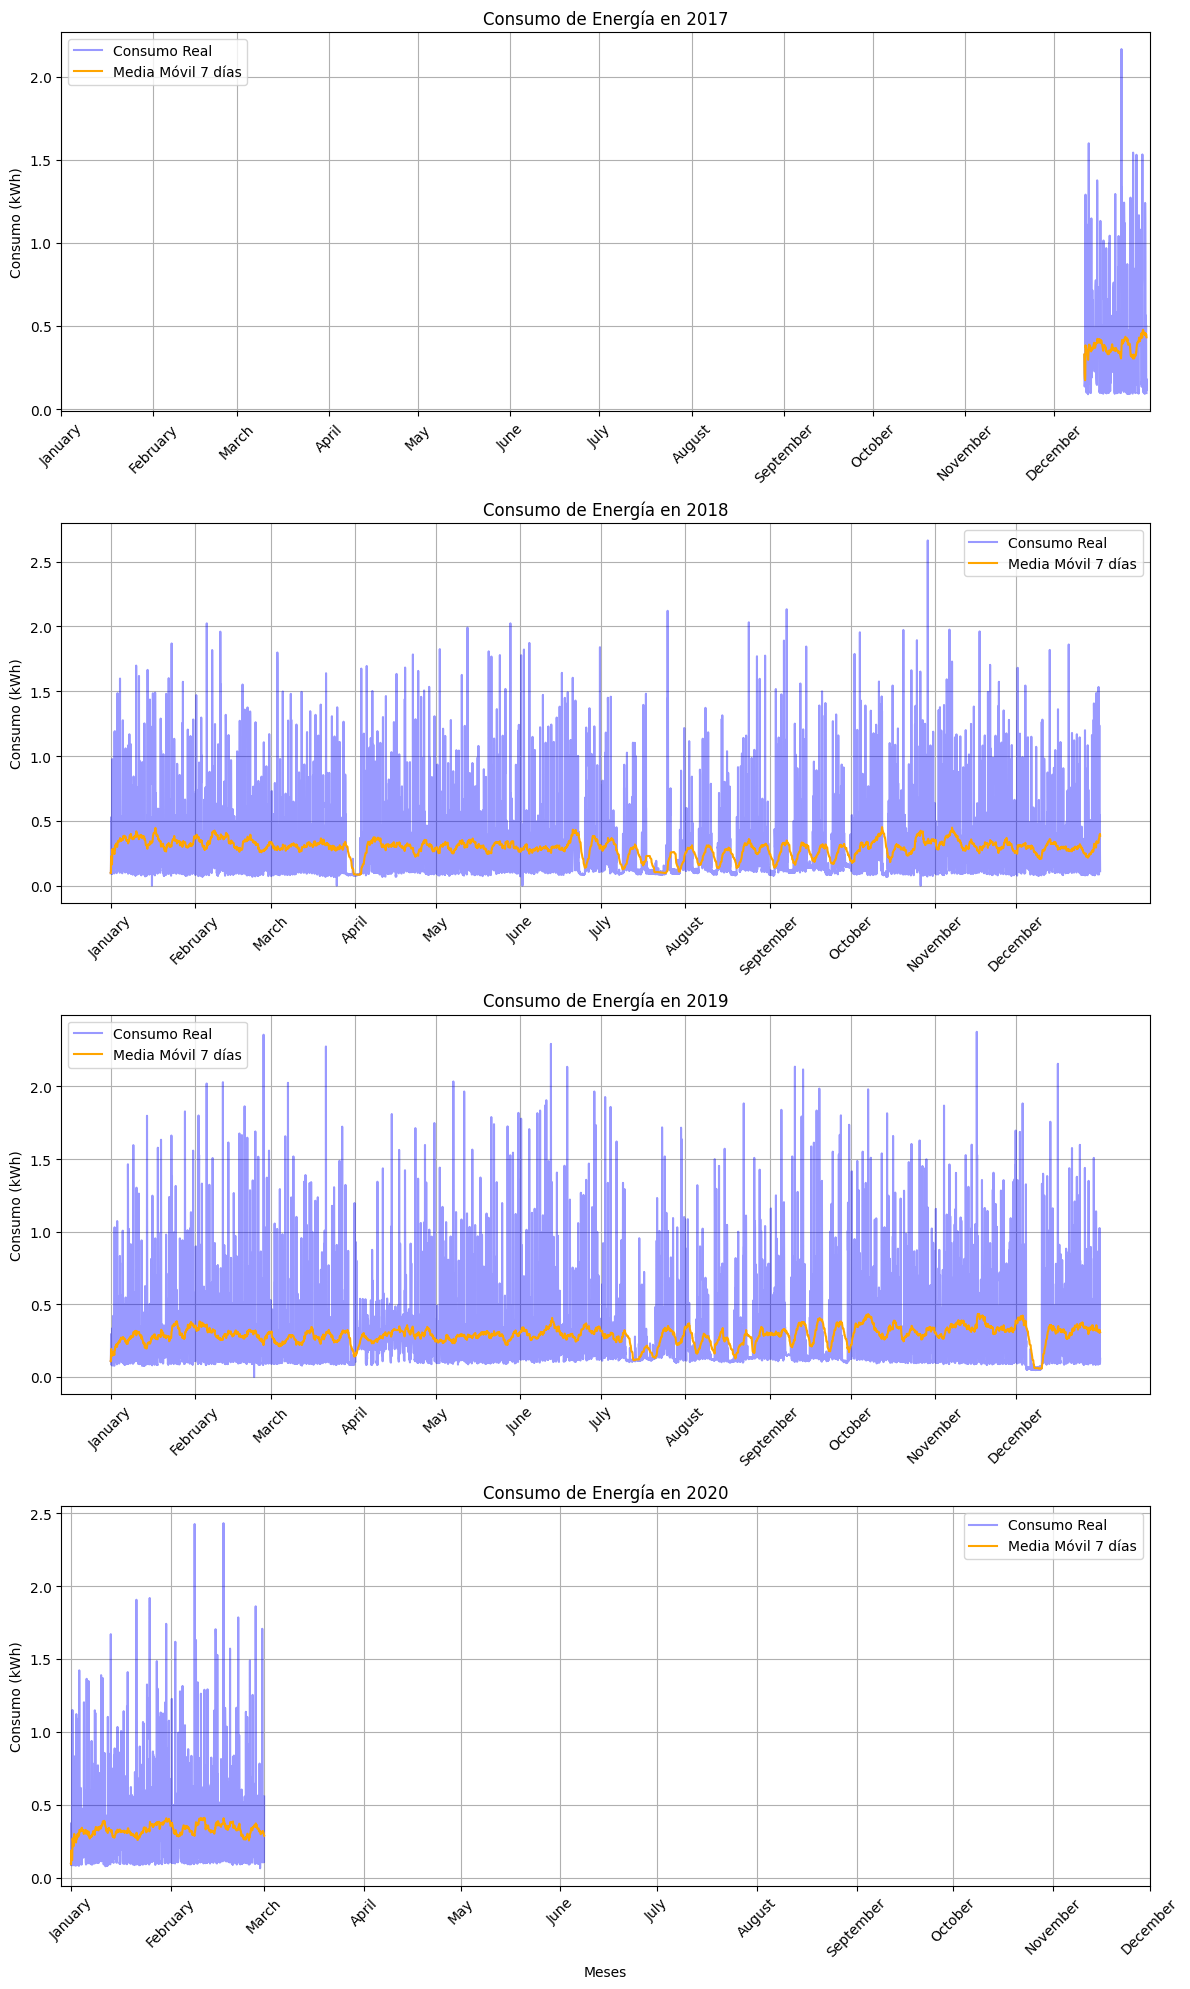

In [32]:
import matplotlib.pyplot as plt
import pandas as pd

# Convertir la columna timestamp a datetime si no está en formato datetime
df['timestamp'] = pd.to_datetime(df['timestamp'])

# Crear una nueva columna con el año
df['año'] = df['timestamp'].dt.year

# Obtener los años únicos en los datos
años = sorted(df['año'].unique())

# Crear la figura con subgráficos para cada año
fig, axes = plt.subplots(len(años), 1, figsize=(12, 5 * len(años)), sharex=False)

# Si solo hay un año, aseguramos que axes sea iterable
if len(años) == 1:
    axes = [axes]

# Graficar el consumo por año con su media móvil de 7 días
for i, año in enumerate(años):
    ax = axes[i]
    
    # Filtrar los datos para el año actual
    df_año = df[df['año'] == año].copy()
    
    # Calcular la media móvil de 7 días
    df_año['media_movil_7d'] = df_año['consumo_kwh'].rolling(window=3 * 24, min_periods=1).mean()  # 7 días * 24 horas
    
    # Graficar el consumo real con baja opacidad
    ax.plot(df_año['timestamp'], df_año['consumo_kwh'], linestyle='-', alpha=0.4, label="Consumo Real", color='blue')
    
    # Graficar la media móvil en naranja
    ax.plot(df_año['timestamp'], df_año['media_movil_7d'], linestyle='-', color='orange', label="Media Móvil 7 días")

    # Configurar el eje X para que solo muestre el 1 de cada mes con el nombre del mes
    meses_marcas = pd.date_range(start=f"{año}-01-01", end=f"{año}-12-31", freq='MS')  # 'MS' = Month Start
    ax.set_xticks(meses_marcas)
    ax.set_xticklabels(meses_marcas.strftime('%B'), rotation=45)

    # Estilo del gráfico
    ax.set_title(f"Consumo de Energía en {año}")
    ax.set_ylabel("Consumo (kWh)")
    ax.grid(True)
    ax.legend()

# Ajustar diseño para evitar superposición
plt.xlabel("Meses")
plt.tight_layout()

# Mostrar el gráfico
plt.show()


In [33]:
file_path_hogar = '../../../processed/datos_consumo/hogar_individual_bcn/casa_bcn_clean.csv'
df.to_csv(file_path_hogar, index=False)
